In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load vehicle list
vehicles = pd.read_csv('vehicle_list.csv')

vehicles.head(10)

,fleet,truck_number,platform_id,vehicle_year,vehicle_make,vehicle_model,date_of_service,dpf_failure
0,Conway,432 3619,309450,2014,Freightliner,Cascadia,1/4/2019,Yes
1,Conway,432 3577,308374,2014,Freightliner,Cascadia,1/9/2019,Yes
2,Conway,426 6337,10315963,2013,Freightliner,Cascadia,1/17/2019,Yes
3,Conway,532 4279,10314364,2014,Freightliner,Cascadia,1/28/2019,Yes
4,Conway,432 3754,307112,2014,Freightliner,Cascadia,2/13/2019,Yes
5,Conway,532 5458,10312983,2015,Freightliner,Cascadia,3/16/2019,Yes
6,Conway,432 3874,308049,2014,Freightliner,Cascadia,3/19/2019,Yes
7,Conway,632 3472,310201,2013,Freightliner,Cascadia,4/9/2019,Yes
8,Conway,432 3721,303576,2014,Freightliner,Cascadia,4/17/2019,Yes
9,Conway,432 2497,302332,2012,Freightliner,Cascadia,4/20/2019,Yes


In [5]:
# How many with and without failures?

vehicles.groupby('dpf_failure').size()

dpf_failure
No     69
Yes    92
dtype: int64

In [127]:
# list of truck id with/without dpf_failure:
dpf_normal = []
dpf_failure = []

for i, e in vehicles.iterrows():
    if(e.dpf_failure == 'No'):
        dpf_normal.append(e.platform_id)
    else:
        dpf_failure.append(e.platform_id)
len(dpf_normal)

69

# Load all data

In [16]:
# Load all data

frames = []

for i, e in vehicles.iterrows():
    try:
        tmp = pd.read_csv('./individual_files/{}_daily_data.csv'.format(e.platform_id))
        del tmp['Unnamed: 0']
        del tmp['platform_id'] # Because iterated from the order of vehicle.platform_id
        frames.append(tmp)
    except:
        None
all_data = pd.concat(frames, axis=0,  keys=vehicles.platform_id.tolist()) # The order of the vehicle.platform_id is the same as tmp's
all_data.head()

date  distance_miles  fuel_used_gallons  duration_mins  \
309450 0  2019-01-02       65.294602           7.743177     222.002017   
       1  2019-01-03      210.269609          32.266755     519.221017   
       2  2019-01-04       98.413486          15.543700     354.276533   
       3  2019-01-05       74.838556          13.602637     131.153333   
       4  2019-01-06        0.000000           0.000000       0.000000   

          idle_duration_mins  fuel_loss_gallons  \
309450 0           44.141633           0.057875   
       1          134.957617           0.495596   
       2           83.660883           0.281884   
       3           30.391967           0.225600   
       4            0.000000           0.000000   

          dpf_regen_inhibited_duration_mins  \
309450 0                         145.853650   
       1                         293.039250   
       2                         115.026133   
       3                         111.522417   
       4                           0.000000   

          dpf_regen_not_inhibited_duration_mins  \
309450 0                               8.650900   
       1                              51.976683   
       2                              31.087450   
       3                              15.201283   
       4                               0.000000   

          dpf_regen_not_active_duration_mins  dpf_regen_active_duration_mins  \
309450 0                          154.504550                        0.000000   
       1                          345.015933                        0.000000   
       2                           41.469600                       57.857333   
       3                            0.000000                      123.756800   
       4                            0.000000                        0.000000   

          dpf_regen_needed_duration_mins  \
309450 0                         0.00000   
       1                         0.00000   
       2                        46.78665   
       3                         2.96690   
       4                         0.00000   

          dpf_regen_inhibit_switch_not_active_duration_mins  \
309450 0                                                0.0   
       1                                                0.0   
       2                                                0.0   
       3                                                0.0   
       4                                                0.0   

          dpf_regen_inhibit_switch_active_duration_mins  vehicle_serviced  \
309450 0                                            0.0                 0   
       1                                            0.0                 0   
       2                                            0.0                 1   
       3                                            0.0                 0   
       4                                            0.0                 0   

                                  diagnostics_trouble_codes  
309450 0                                                 []  
       1                                                 []  
       2  [{'j1939': {'severity': 'unclassified', 'fmi':...  
       3                                                 []  
       4                                                 []

In [24]:
# Access individual truck's data
i = 6
all_data.loc[vehicles.iloc[i].platform_id,:]

,date,distance_miles,fuel_used_gallons,duration_mins,idle_duration_mins,fuel_loss_gallons,dpf_regen_inhibited_duration_mins,dpf_regen_not_inhibited_duration_mins,dpf_regen_not_active_duration_mins,dpf_regen_active_duration_mins,dpf_regen_needed_duration_mins,dpf_regen_inhibit_switch_not_active_duration_mins,dpf_regen_inhibit_switch_active_duration_mins,vehicle_serviced,diagnostics_trouble_codes
0,2019-01-02,217.980949,37.871273,434.233650,145.732117,1.917883,324.759733,77.856433,402.616167,0.000000,0.000000,0.0,0.0,0,"[{'j1939': {'severity': 'unclassified', 'fmi':..."
1,2019-01-03,773.847198,120.327110,798.010167,61.251200,4.020485,744.067367,43.865600,787.932967,0.000000,0.000000,0.0,0.0,0,"[{'j1939': {'severity': 'unclassified', 'fmi':..."
2,2019-01-04,987.012162,146.885554,1063.576433,126.815250,4.584875,976.207150,81.953617,1058.160767,0.000000,0.000000,0.0,0.0,0,"[{'j1939': {'severity': 'unclassified', 'fmi':..."
3,2019-01-05,555.012699,78.064392,657.412083,109.742633,2.245548,569.853783,81.322317,651.176100,0.000000,0.000000,0.0,0.0,0,"[{'j1939': {'severity': 'unclassified', 'fmi':..."
4,2019-01-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,[]
5,2019-01-07,552.313111,85.182049,596.943433,63.351617,2.182047,553.257400,38.903300,592.160700,0.000000,0.000000,0.0,0.0,0,"[{'j1939': {'severity': 'unclassified', 'fmi':..."
6,2019-01-08,635.044902,105.418840,762.614933,110.477700,2.567051,680.182633,70.103517,750.286150,0.000000,0.000000,0.0,0.0,0,[]
7,2019-01-09,1000.624575,166.671142,1067.535033,124.423983,4.615095,969.475567,89.207417,1058.682983,0.000000,0.000000,0.0,0.0,0,"[{'j1939': {'severity': 'unclassified', 'fmi':..."
8,2019-01-10,991.828496,151.898811,1052.645983,87.423500,3.657309,993.279783,40.702633,1033.982417,0.000000,0.000000,0.0,0.0,0,"[{'j1939': {'severity': 'unclassified', 'fmi':..."
9,2019-01-11,445.588162,69.978499,536.782850,108.373433,1.878210,483.303467,51.536533,534.840000,0.000000,0.000000,0.0,0.0,0,"[{'j1939': {'severity': 'unclassified', 'fmi':..."


In [387]:
# Label 14 days before dpf failure as failure.
all_data


In [196]:
# Training example
data_test = all_data[['distance_miles','fuel_used_gallons','duration_mins','idle_duration_mins',
                      'fuel_loss_gallons','dpf_regen_inhibited_duration_mins','dpf_regen_not_inhibited_duration_mins',
                      'dpf_regen_not_active_duration_mins'
                    ]]
data_test.head()

distance_miles  fuel_used_gallons  duration_mins  \
309450 0       65.294602           7.743177     222.002017   
       1      210.269609          32.266755     519.221017   
       2       98.413486          15.543700     354.276533   
       3       74.838556          13.602637     131.153333   
       4        0.000000           0.000000       0.000000   

          idle_duration_mins  fuel_loss_gallons  \
309450 0           44.141633           0.057875   
       1          134.957617           0.495596   
       2           83.660883           0.281884   
       3           30.391967           0.225600   
       4            0.000000           0.000000   

          dpf_regen_inhibited_duration_mins  \
309450 0                         145.853650   
       1                         293.039250   
       2                         115.026133   
       3                         111.522417   
       4                           0.000000   

          dpf_regen_not_inhibited_duration_mins  \
309450 0                               8.650900   
       1                              51.976683   
       2                              31.087450   
       3                              15.201283   
       4                               0.000000   

          dpf_regen_not_active_duration_mins  
309450 0                          154.504550  
       1                          345.015933  
       2                           41.469600  
       3                            0.000000  
       4                            0.000000

In [327]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

window_size = 20

def generate_windows(data, ws=window_size, scaler=StandardScaler):
    ll = len(data)
    dd = scaler().fit_transform(data)
    X = []
    y = []
    
    for i in range(0, (ll - ws)):
        X.append(dd[i:i+ws])
        y.append(dd[i:i+ws])
    
    return X, y

def generate_training(data, normal = dpf_normal):
    Xs = []
    Ys = []
    for i in normal: # Add each truck to training data
        X, y = generate_windows(data.loc[i,:])
        Xs = Xs + X
        Ys = Ys + y
    X_tr, X_ts, y_tr, y_ts = [np.array(x) for x in train_test_split(Xs, Ys)]
    assert X_tr.shape[2] == X_ts.shape[2] == data.loc[i:].shape[1]
    return (X_tr, y_tr, X_ts, y_ts)

def generate_single(data):
    Xs = []
    Ys = []
    X, y = generate_windows(data.loc[302372,:])
    Xs = Xs + X
    Ys = Ys + y
    X_tr, X_ts, y_tr, y_ts = [np.array(x) for x in train_test_split(Xs, Ys)]
    assert X_tr.shape[2] == X_ts.shape[2] == data.loc[i:].shape[1]
    return (X_tr, y_tr, X_ts, y_ts)

In [357]:
X, y, XX, yy = generate_training(data_test)
X.shape

(33903, 20, 8)

# Autoencoders

### Convoluted

In [365]:
import keras
from keras import layers

model = keras.Sequential(
    [
        layers.Input(shape=(X.shape[1], X.shape[2])),
        layers.Conv1D(
            filters=8, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=4, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=4, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=8, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_26 (Conv1D)           (None, 10, 8)             456       
_________________________________________________________________
dropout_26 (Dropout)         (None, 10, 8)             0         
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 5, 4)              228       
_________________________________________________________________
conv1d_transpose_39 (Conv1DT (None, 10, 4)             116       
_________________________________________________________________
dropout_27 (Dropout)         (None, 10, 4)             0         
_________________________________________________________________
conv1d_transpose_40 (Conv1DT (None, 20, 8)             232       
_________________________________________________________________
conv1d_transpose_41 (Conv1DT (None, 20, 1)           

In [366]:
train1 = model.fit(
    X,
    X,
    epochs=100,
    batch_size=100,
    validation_split=0.2,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/100
272/272 [==============================] - 3s 10ms/step - loss: 0.7340 - val_loss: 0.5176
Epoch 2/100
272/272 [==============================] - 2s 8ms/step - loss: 0.5511 - val_loss: 0.4517
Epoch 3/100
272/272 [==============================] - 2s 9ms/step - loss: 0.4935 - val_loss: 0.4079
Epoch 4/100
272/272 [==============================] - 2s 7ms/step - loss: 0.4646 - val_loss: 0.3971
Epoch 5/100
272/272 [==============================] - 2s 7ms/step - loss: 0.4530 - val_loss: 0.3923
Epoch 6/100
272/272 [==============================] - 2s 7ms/step - loss: 0.4464 - val_loss: 0.3901
Epoch 7/100
272/272 [==============================] - 2s 7ms/step - loss: 0.4409 - val_loss: 0.3885
Epoch 8/100
272/272 [==============================] - 2s 7ms/step - loss: 0.4382 - val_loss: 0.3837
Epoch 9/100
272/272 [==============================] - 2s 7ms/step - loss: 0.4362 - val_loss: 0.3782
Epoch 10/100
272/272 [==============================] - 2s 7ms/step - loss: 0.4317 - val_l

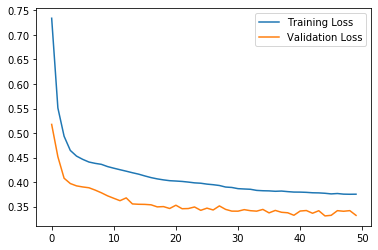

In [367]:
plt.plot(train1.history["loss"], label="Training Loss")
plt.plot(train1.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

### LSTM

In [386]:
epochs = 100
batch_size = 100
window_size = 50

model2 = keras.Sequential()
model2.add(keras.layers.LSTM(8, kernel_initializer='he_uniform', batch_input_shape=(None, X.shape[1], X.shape[2]), return_sequences=True, name='encoder_1'))
model2.add(keras.layers.LSTM(4, kernel_initializer='he_uniform', return_sequences=False, name='encoder_2'))
model2.add(keras.layers.RepeatVector(X.shape[1], name='encoder_decoder_bridge'))
model2.add(keras.layers.LSTM(4, kernel_initializer='he_uniform', return_sequences=True, name='decoder_2'))
model2.add(keras.layers.LSTM(8, kernel_initializer='he_uniform', return_sequences=True, name='decoder_3'))
model2.add(keras.layers.TimeDistributed(keras.layers.Dense(X.shape[2])))
model2.compile(loss="mse",optimizer='adam')
model2.build()
model2.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_1 (LSTM)             (None, 20, 8)             544       
_________________________________________________________________
encoder_2 (LSTM)             (None, 4)                 208       
_________________________________________________________________
encoder_decoder_bridge (Repe (None, 20, 4)             0         
_________________________________________________________________
decoder_2 (LSTM)             (None, 20, 4)             144       
_________________________________________________________________
decoder_3 (LSTM)             (None, 20, 8)             416       
_________________________________________________________________
time_distributed_11 (TimeDis (None, 20, 8)             72        
Total params: 1,384
Trainable params: 1,384
Non-trainable params: 0
___________________________________________________

In [385]:
model2.fit(x=X, y=y, validation_data=(XX, yy), epochs=100, batch_size=batch_size, shuffle=True, callbacks=[early_stop])

Epoch 1/100
340/340 [==============================] - 19s 57ms/step - loss: 0.9199 - val_loss: 0.8930
Epoch 2/100
340/340 [==============================] - 16s 47ms/step - loss: 0.8779 - val_loss: 0.8640
Epoch 3/100
340/340 [==============================] - 15s 43ms/step - loss: 0.8471 - val_loss: 0.8400
Epoch 4/100
340/340 [==============================] - 16s 47ms/step - loss: 0.8303 - val_loss: 0.8283
Epoch 5/100
340/340 [==============================] - 15s 44ms/step - loss: 0.8201 - val_loss: 0.8170
Epoch 6/100
340/340 [==============================] - 15s 43ms/step - loss: 0.8092 - val_loss: 0.8087
Epoch 7/100
340/340 [==============================] - 17s 49ms/step - loss: 0.7955 - val_loss: 0.7876
Epoch 8/100
340/340 [==============================] - 15s 44ms/step - loss: 0.7535 - val_loss: 0.7439
Epoch 9/100
340/340 [==============================] - 15s 44ms/step - loss: 0.7245 - val_loss: 0.7238
Epoch 10/100
340/340 [==============================] - 15s 43ms/step - l